# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. 

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## 1. Откройте и изучите файл

Загружаем необходимые для выполнения работы библиотеки

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier

считываем датасет

In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')



смотрим на наши данные

In [3]:
display(data.head())

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
display(data.describe())
display(data.info())

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
calls       3214 non-null float64
minutes     3214 non-null float64
messages    3214 non-null float64
mb_used     3214 non-null float64
is_ultra    3214 non-null int64
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


None

## 2. Разбейте данные на выборки

Выделяем из датасета валидационную выборку (20% от всего датасета)

In [5]:
data_mid, data_valid = train_test_split(data,  test_size=0.20, random_state=12345)


Выделяем из оставшихся 80% исходных данных тестовую выборку (также 20% от исходного датасета или 25% от текущего)

In [6]:
data_train, data_test = train_test_split(data_mid,  test_size=0.25, random_state=12345)

Создаём тренировочные таблицы.

In [7]:
features_train = data_train.drop(['is_ultra'], axis=1)
target_train = data_train['is_ultra']

Создаём тестовые таблицы

In [8]:
features_test = data_test.drop(['is_ultra'], axis=1)
target_test = data_test['is_ultra']

Создаём валидационные таблицы

In [9]:
features_valid = data_valid.drop(['is_ultra'], axis=1)
target_valid = data_valid['is_ultra']

## 3. Исследуйте модели

###  DecisionTree

создаем таблицу в которой будем хранить результаты испытания модели с разными параметрами:   
* max_depth
* min_samples_split
* min_samples_leaf

In [10]:
dtc = pd.DataFrame(columns=['depth','mss','msl','acc'])

Проводим испытание модели.

In [11]:
s=0
for depth in range(1, 36, 1):
    for mss in range(2,5,1):
            for msl in range(1,5,1):
                model = DecisionTreeClassifier(max_depth=depth, min_samples_split =mss,min_samples_leaf=msl, random_state=12345)

                model.fit(features_train, target_train)
                predictions = model.predict(features_valid)

                #rmse = mean_squared_error(target_valid, predictions)**0.5
                #print("n_estimators =", estim, ":", rmse)
                accuracy = accuracy_score(target_valid, predictions)
                dtc.loc[s, 'acc'] = accuracy
                dtc.loc[s, 'depth'] = depth
                dtc.loc[s, 'mss'] = mss
                dtc.loc[s, 'msl'] = msl
                s+=1
               


находим лучший показатель **accuracy**

In [12]:
dtc_max=max(dtc['acc'])

Проверяем при каких параметрах были достигнуты лучшие результаты

In [13]:
display(dtc.query('acc==@dtc_max'))

,depth,mss,msl,acc
39,4,2,4,0.796267
43,4,3,4,0.796267
47,4,4,4,0.796267


Сразу при нескольких вариантах дерева были достигнуты лушие показатели, в дальнейшем если мы выберем эту модель, то будем использовать с минимальными значениями параметров т.к. это увеличит быстродействие.

### RandomForestClassifier

Аналогично создаём таблицу для наших результатов при разных параметрах:
* n_estimators
* max_depth
* min_samples_leaf

In [14]:
rfc = pd.DataFrame(columns=['estim','depth','msl','acc'])

Проводим тестирование.

In [15]:
for estim in range(10, 51, 10):
    for depth in range(1,10,1):
        for msl in range(1,10,1):
            model = RandomForestClassifier(n_estimators=estim, max_depth=depth, min_samples_leaf=msl, random_state=12345)

            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
            accuracy = accuracy_score(target_valid, predictions)
            
            rfc.loc[s, 'acc'] = accuracy
            rfc.loc[s, 'depth'] = depth
            rfc.loc[s, 'msl'] = msl
            rfc.loc[s, 'estim'] = estim
            s+=1

находим лучший результат.

In [16]:
rfc_max = max(rfc['acc'])

Смотрим при каких парамтерах он был достигнут.

In [17]:
display(rfc.query('acc==@rfc_max'))

,estim,depth,msl,acc
660,30,9,7,0.805599


### RandomForestClassifier

Тестируем эту модель без дополнительных параметров.

In [18]:
model = RidgeClassifier(random_state=12345)

model.fit(features_train, target_train)
predictions = model.predict(features_valid)

accuracy = accuracy_score(target_valid, predictions)
print('accuracy=',accuracy)

accuracy= 0.7558320373250389


### Выводы
Лучшей по показателю accuracy оказалась модель RandomForestClassifier.
Эта модель медленная, считаю что в рамках текущего исследования это допустимо.

В случае если бы быстродействие было бы критичной, я бы выбрал модель DecisionTreeClassifier, которая совсем немного отстаёт в количестве правильных ответов, но быстрее.

## 4. Проверьте модель на тестовой выборке

Лучшей моделью оказалась **RandomForestClassifier** с параметрам:
* n_estimators=30
* max_depth=9
* min_samples_leaf=7

и accurancy = 0.805599

Проверим модель на тестовой выборке.

In [19]:
model = RandomForestClassifier(n_estimators=30, max_depth=9, min_samples_leaf=7, random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
accuracy = accuracy_score(target_test, predictions)
print('accuracy=',accuracy)

accuracy= 0.7947122861586314


0,79 % правильных ответов, довольно не плохой показатель.
Наша цель в 75% достигнута.

**Модель можно считать успешно работающей.**

## 5. (бонус) Проверьте модели на адекватность

Проверим модель на адекватность, сравним правильные ответы и предсказанные ответы.

0    0.688958
1    0.311042
Name: is_ultra, dtype: float64


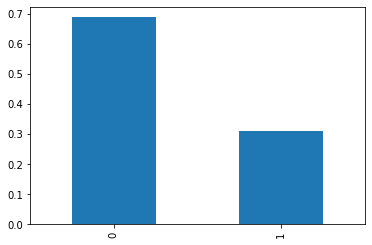

In [20]:
class_frequency = target_test.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

0    0.807154
1    0.192846
dtype: float64


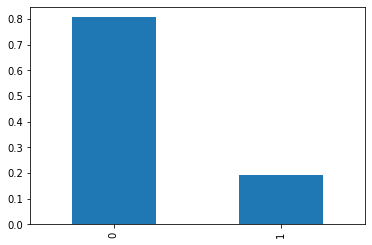

In [21]:
predicted_valid = pd.Series(model.predict(features_test))

class_frequency = predicted_valid.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar')

**Есть небольшие отклоенния соответствующие нашему показатель accuracy**

###  доп проверка 

Константная модель

In [25]:
preditions_const = pd.Series(0, target_test.index)

In [32]:
const_accuracy_score=accuracy_score(target_test, preditions_const)
print('accuracy=',const_accuracy_score)

accuracy= 0.6889580093312597


Наша модель.

In [31]:
model = RandomForestClassifier(n_estimators=30, max_depth=9, min_samples_leaf=7, random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
accuracy = accuracy_score(target_test, predictions)
print('accuracy=',accuracy)

accuracy= 0.7947122861586314



<b>Вывод:</b> 
    
Наша модель прошла проверку на адекватность т.к. accuracy выше чем у константной модели.